# Demo de Algortimos de Inducción para generar reglas para clasificar Naves Imperiales de Star Wars


In [1]:
#@title Librerías a usar
import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output

import os
import csv

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math

print("Librerías cargadas")

Librerías cargadas


In [2]:
#@title Acceder al Drive

# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/MyDrive/IA/demoStarWars/datos/'  #@param {type:"string"}


Mounted at /content/gdrive


In [3]:

#@title Cargar datos


#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'naves.csv'  #@param {type:"string"}
#@markdown ### Configuración del archivo CSV:
delimitador_columnas = ',' #@param {type:"string"}

## selección de los parámetros

# función para cargar configuración datos automática
def cargarNombreClases(path, archivo_datos):
  # importa definición de la clase
  arClasesFN = archivo_datos.split('.')[0] + '_nombreClases.txt'
  if os.path.isfile( path + '/' + arClasesFN ):
    with open( path + '/' + arClasesFN, mode='r') as csvfile:
        r = csv.reader(csvfile, delimiter=',')
        auxAtributo = r.__next__()
        auxClases = r.__next__()
    print('\n> Definición de los valores discretos para la clase cargada de ' + arClasesFN +'.\n')
    return auxAtributo[0], ','.join(auxClases)
  else:
    return "", ""

# función auxiliara para que no ejecute UI cada vez
def hacerNada():
  return

# se define esta función para que se ocupe de aplicar la configuración
def on_buttonAplicar_clicked(b):
  print("")
  funcionCambiaSeleccion_ConfigDatos(combo_att_clase.value, texto_nomClases.value, combo_att_entrada.value)

# aplica configuración de datos
def funcionCambiaSeleccion_ConfigDatos(attClase, nomClases, att_entrada):
  global Y, X, nombre_clases, atributos_entrada, ClassAttributeName

  if (attClase is None) or (attClase =="") or\
    (att_entrada is None) or (att_entrada ==""):
    return

  # si el atributo clase está como de entrada, lo saca (no tiene sentido)
  att_entrada = list(att_entrada)
  if attClase in att_entrada:
    print("Eliminando atributo " + attClase + " como de entrada dado que es clase.")
    att_entrada.remove( attClase )

  if (att_entrada == "") or (len(att_entrada)==0):
    print("No se han definido atributos de entrada!")
    return

  # guarda configuración
  nombre_clases = nomClases

    # genera los datos solo con los atributos seleccionados
  Y = np.array(df[attClase])
  X = np.array(df[att_entrada])

  # muestra resultados
  print("\n> Atributos entrada: ", att_entrada)
  print("\t X: ", X.shape)

  if (nombre_clases is None) or (nombre_clases==""):
    print("\n> Atributo clase: ", attClase)
  else:
    print("\n> Atributo clase: ", attClase, " [", nombre_clases, "]")
  print("\t Y: ", Y.shape)

  # guarda para usar luego
  atributos_entrada = att_entrada
  ClassAttributeName = attClase

## aplicación de los parámetros elegidos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos,  sep=delimitador_columnas, engine="python")
print("Archivo de datos ", archivo_datos, " cargado")

print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())
print("\n")

# inicializa valores
X = None
Y = None
atributos_entrada = []
ClassAttributeName = ""

# intenta cargar configuración asociada a los datos
# trata de obtener la configuración del archivo asociado
atributo_clase, nombre_clases = cargarNombreClases(path, archivo_datos)

# muestra interface para cargar configuración

# auxiliar para que muestre bien la descripción
style_3D = {'description_width': 'initial'}

tit = widgets.Label("Ajuste para configuración de los Datos: ")

# prepara combo para determinar atributo clase
selecc_atributos = [ ]
selecc_atributos.extend( df.columns.values.tolist() )
if (atributo_clase is None) or (atributo_clase=="") or (atributo_clase not in selecc_atributos):
  att_selecc_defecto = len(selecc_atributos)-1
else:
  att_selecc_defecto = selecc_atributos.index(atributo_clase)
combo_att_clase = widgets.Dropdown(
    options = selecc_atributos,
    value = selecc_atributos[att_selecc_defecto], # mostrar por defecto de config
    description = 'Atributo clase:',
    style=style_3D,
    disabled = False,
)
# prepara campo para ingresar nombre clases (toma por defecto de config)
texto_nomClases = widgets.Text(
    value=nombre_clases,
    placeholder='Ingrese nombre clases (si corresponde) separados por comas',
    description='Nombre clases:',
    style=style_3D,
    disabled=False
)

combo_att_entrada = widgets.SelectMultiple(
    options=selecc_atributos,
    value=selecc_atributos,
    #rows=10,
    description='Atributos de entrada:',
    style=style_3D,
    disabled=False
)

# prepara botón y grilla con objetos
btnAplicar = widgets.Button(
    description='Aplicar'
)
configDatos_ui = widgets.GridBox(
      children=[tit, combo_att_clase, texto_nomClases, combo_att_entrada, btnAplicar],
      layout=Layout(width='100%')  )
btnAplicar.on_click(on_buttonAplicar_clicked)

#clear_output()
out_config = widgets.interactive_output(hacerNada, {})
display(configDatos_ui)

# ejecuta para que muestre
on_buttonAplicar_clicked(btnAplicar)


Archivo de datos  naves.csv  cargado

> Cabecera: 
   Manufacturer  Length  Crew  Cargo Capacity  Consumables  Speed   Hull  \
0          14.0     6.3   1.0            65.0     0.066667  100.0    9.0   
1          20.0     7.0   1.0            65.0     0.066667  100.0   10.0   
2          24.0   100.0  45.0        500000.0     5.000000   70.0  257.0   
3          18.0     6.3   1.0            65.0     0.066667  100.0    9.0   
4          18.0     6.3   1.0            65.0     0.066667  110.0    9.0   

   Troops  Hyperdrive Multiplier  Hyperdrive Backup  Shields  \
0     0.0                   -1.0               -1.0     -1.0   
1     0.0                   -1.0               -1.0     -1.0   
2    60.0                    1.0               15.0    622.0   
3     0.0                   -1.0               -1.0     -1.0   
4     0.0                   -1.0               -1.0     20.0   

   Special Features  Onboard Craft  BLASTER CANNONS  LASER CANNON TURRETS  \
0          0.037319       0.02

GridBox(children=(Label(value='Ajuste para configuración de los Datos: '), Dropdown(description='Atributo clas…


Eliminando atributo Ship Type como de entrada dado que es clase.

> Atributos entrada:  ['Manufacturer', 'Length', 'Crew', 'Cargo Capacity', 'Consumables', 'Speed', 'Hull', 'Troops', 'Hyperdrive Multiplier', 'Hyperdrive Backup', 'Shields', 'Special Features', 'Onboard Craft', 'BLASTER CANNONS', 'LASER CANNON TURRETS', 'LASER CANNONS TURRETS', 'ION CANNONS', 'TRACTOR BEAM PROJECTORS', 'LASER CANNONS', 'DOUBLE TURBOLASER CANNONS', 'QUAD LASER CANNONS', 'CONCUSSION MISSILE LAUNCHERS', 'PROTON TORPEDO LAUNCHERS', 'MU-1', 'LASER CANNONS / MU-3: 2 MEDIUM LASER CANNONS', 'GRAVITY WELL PROJECTORS', 'MEDIUM BLASTER CANNONS', 'LIGHT TURBOLASER CANNONS', 'PROTON TORPEDOS', 'ORBITAL MINE OR THERMAL DETONATOR LAUNCHER.', 'QUAD LASER CANNON TURRETS', 'GENERAL PURPOSE LAUNCHERS', 'ION CANNON TURRETS', 'REPEATING BLASTER TURRETS', 'TURBOLASER CANNONS', '(VARIES ACCORDING TO SHIP MODEL)', 'TURBOLASER BATTERIES', 'ORBITAL MINE OR THERMAL DETONATOR LAUNCHERS.', 'DOUBLE LASER CANNONS', 'DOUBLE BLASTER CA

In [4]:
#@title Preparar datos

#@markdown Para algoritmos de inducción siempre el atributo clase debe ser considerado como Discreto
considerar_atributo_clase = "discreto - CLASIFICACION" #@param ["discreto - CLASIFICACION"]  ## , "continuo - ESTIMACION"

#@markdown Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   75#@param {type:"integer"}

print("> se considera problema de CLASIFICACIÓN \n")

CLASES = []
# define nombre de clases
if (nombre_clases == "") or (nombre_clases == "-"):
    # toma los valores de clase orginales del archivo
    if str(Y[0]).replace(".","").isnumeric():
        # Y son numeros
        for val in range(int(np.max(Y))+1):
          CLASES.append( "clase {:>3}".format(val) )
        # para algoritmos de inducción la salida debe ser discreta
        # asi que se define lista auxiliar ya con nombre de clases
        Ydisc = [ CLASES[y] for y in Y ]
    else:
        # Y no son números
        CLASES = list(set(Y))
        CLASES.sort()
        # ya son discretos
        Ydisc = Y
else:
    # toma configuración de nombre de clases
    for val in nombre_clases.split(','):
      CLASES.append( val )
    # para algoritmos de inducción la salida debe ser discreta
    # asi que se define lista auxiliar ya con nombre de clases
    Ydisc = [ CLASES[y] for y in Y ]

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

# separa al azar usando muestreo con proporción indicada
# intenta hacer muestreo estatificado
try:
  x_train, x_test, y_train, y_test = train_test_split(X, Ydisc, test_size=(1-propTrain), stratify=Y)
except ValueError:
  print("-- No se puede aplicar Muestreo Estratificado! -> se usa Muestreo Simple \n")
  # hace muestreo simple
  x_train, x_test, y_train, y_test = train_test_split(X, Ydisc, test_size=(1-propTrain))

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for cl in CLASES:
  cant = 0
  for y in y_train:
    if cl == y: cant = cant + 1
  print("    ", cl, ":", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for cl in CLASES:
  cant = 0
  for y in y_test:
    if cl == y: cant = cant + 1
  print("    ", cl, ":", cant)




> se considera problema de CLASIFICACIÓN 


> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (80, 74)
 - y_train (cant):  80
     Command Ships : 2
     Heavy Ships : 10
     Landing Craft : 5
     Medium Ships : 11
     Other Starfighters : 8
     Patrol Craft : 5
     Shuttles : 5
     TIE Bombers : 5
     TIE Experimental Craft : 4
     TIE Fighters : 15
     TIE Support Craft : 7
     Transporters : 3

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (27, 74)
 - y_test (cant):  27
     Command Ships : 1
     Heavy Ships : 4
     Landing Craft : 2
     Medium Ships : 4
     Other Starfighters : 2
     Patrol Craft : 2
     Shuttles : 1
     TIE Bombers : 1
     TIE Experimental Craft : 1
     TIE Fighters : 5
     TIE Support Craft : 3
     Transporters : 1


In [5]:
#@title Aplicar Algoritmo de Inducción

# parámetros

param_criterio = "Entropy" #@param ["Entropy", "Error", "Gini impurity"]
if param_criterio == "Entropy":
  pCriteria = "entropy"
elif param_criterio == "Error":
  pCriteria = "log_loss"
#elif param_criterio == "Gini impurity":
else:
  pCriteria = "gini"
param_max_depth = 0 #@param {type:"number"}
if param_max_depth < 1:
    # menor que 1 es opcional
    param_max_depth = None
param_split_strategy = "Best" #@param ["Best", "Random"]
if param_split_strategy== "Best":
  pSpliter = "best"
#elif param_split_strategy == "Random":
else:
  pSpliter = "random"
param_min_samples_split  = 5 #@param {type:"number"}
if param_min_samples_split  < 2:
    param_min_samples_split  = 2
param_min_samples_leaf  = 3 #@param {type:"number"}
if param_min_samples_leaf  < 1:
    param_min_samples_leaf  = 1
param_max_leaf_nodes = 0 #@param {type:"number"}
if param_max_leaf_nodes < 2:
    param_max_leaf_nodes = None

tipo_output_softMax = False

# genera el árbol y lo muestra
clf = tree.DecisionTreeClassifier(criterion=pCriteria,
                                  splitter=pSpliter,
                                  max_depth=param_max_depth,
                                  min_samples_split=param_min_samples_split,
                                  min_samples_leaf=param_min_samples_leaf,
                                  max_leaf_nodes=param_max_leaf_nodes)
clf = clf.fit(x_train, y_train)

# muestra las reglas
r = tree.export_text(clf, feature_names= list(atributos_entrada))

print("> Reglas:" )
print(r)




> Reglas:
|--- Length <= 16.80
|   |--- Speed <= 83.50
|   |   |--- Troops <= 0.50
|   |   |   |--- Hull <= 18.50
|   |   |   |   |--- class: Other Starfighters
|   |   |   |--- Hull >  18.50
|   |   |   |   |--- class: TIE Bombers
|   |   |--- Troops >  0.50
|   |   |   |--- class: TIE Support Craft
|   |--- Speed >  83.50
|   |   |--- Manufacturer <= 15.50
|   |   |   |--- Length <= 6.85
|   |   |   |   |--- class: Other Starfighters
|   |   |   |--- Length >  6.85
|   |   |   |   |--- class: Other Starfighters
|   |   |--- Manufacturer >  15.50
|   |   |   |--- Manufacturer <= 18.50
|   |   |   |   |--- LASER CANNONS <= 1.50
|   |   |   |   |   |--- class: TIE Fighters
|   |   |   |   |--- LASER CANNONS >  1.50
|   |   |   |   |   |--- class: TIE Fighters
|   |   |   |--- Manufacturer >  18.50
|   |   |   |   |--- Hull <= 17.00
|   |   |   |   |   |--- CONCUSSION MISSILE LAUNCHERS <= 1.00
|   |   |   |   |   |   |--- class: TIE Experimental Craft
|   |   |   |   |   |--- CONCUSSION 

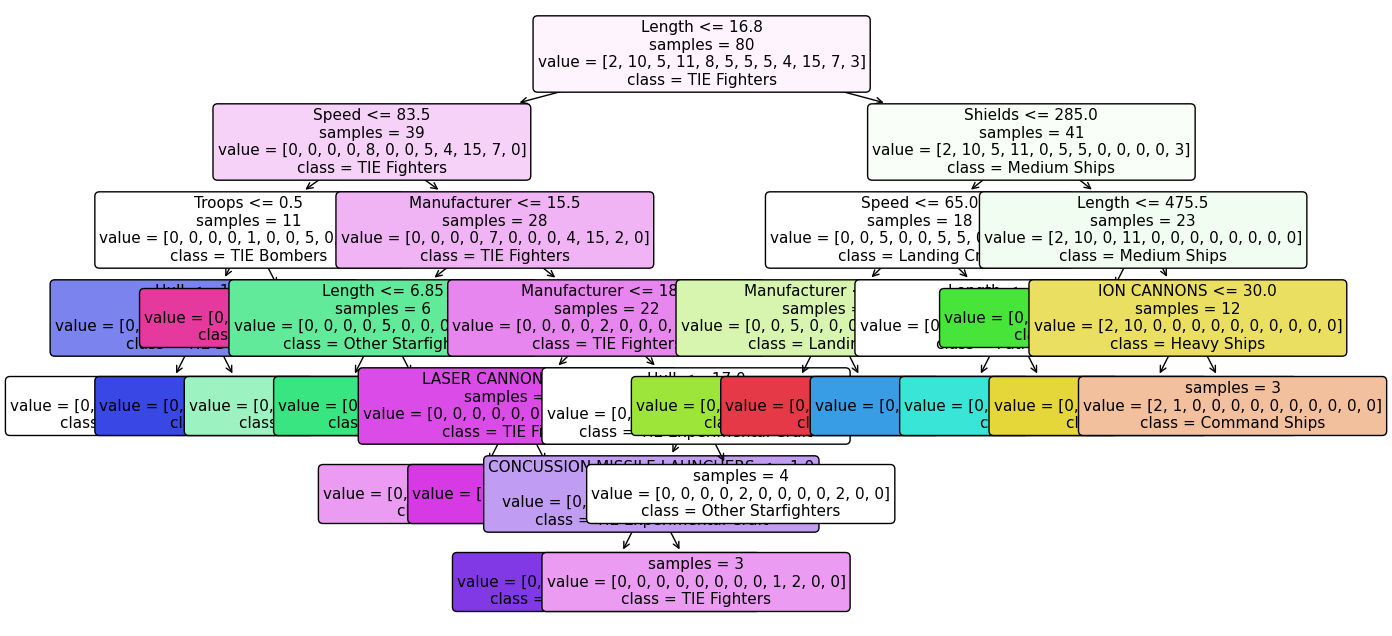

In [6]:
#@title Mostrar Árbol de Decisión


# muestra el árbol
plt.figure(figsize=(15,8))
tree.plot_tree(clf,
              feature_names=atributos_entrada,
              class_names=np.unique(y_train),
              impurity=False,
              rounded=True,
              filled=True,
              fontsize=11)
plt.show()


*** Resultados con datos de Entrenamiento: 

 Reporte de Clasificación: 
                        precision    recall  f1-score   support

         Command Ships       0.67      1.00      0.80         2
           Heavy Ships       1.00      0.90      0.95        10
         Landing Craft       1.00      1.00      1.00         5
          Medium Ships       1.00      1.00      1.00        11
    Other Starfighters       0.62      1.00      0.76         8
          Patrol Craft       1.00      1.00      1.00         5
              Shuttles       1.00      1.00      1.00         5
           TIE Bombers       1.00      0.80      0.89         5
TIE Experimental Craft       1.00      0.75      0.86         4
          TIE Fighters       0.87      0.87      0.87        15
     TIE Support Craft       1.00      0.57      0.73         7
          Transporters       1.00      1.00      1.00         3

              accuracy                           0.90        80
             macro avg       

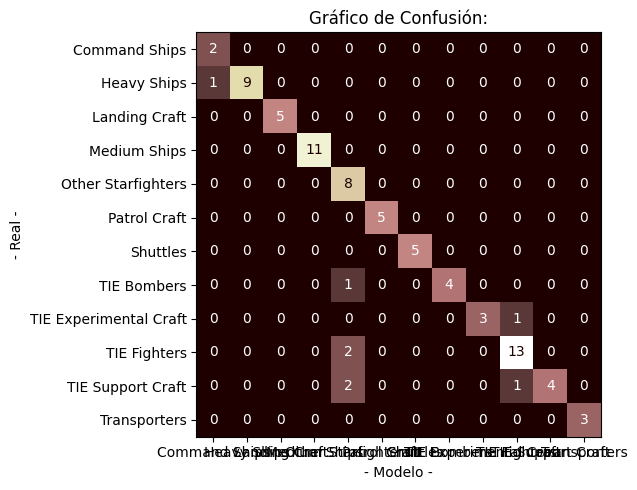

In [7]:
#@title Evaluar red entrenada con datos de entrenamiento

umbral_clasificacion = 50 # param {type:"slider", min:1, max:99, step:1}
mostrar_detalle_entrenamiento = False #@param {type:"boolean"}
incluirDatosEntrada_detalle_entrenamiento = False #@param {type:"boolean"}


# función auxiliar para el cálculo de error
def calcErrores(datos, pred, real, mostrarDetalle=False, inclDatosEntrada=False):
  arAbs = []
  arRel = []

  if mostrarDetalle:
    if inclDatosEntrada:
      print(" Datos ->", end="")
    print(" Valor Real / Valor Modelo [ Error Absoluto | Error Relativo ]")

  for x, pV, r in zip(datos, pred, real):
    # toma el valor estimado/predecido
    p = pV[0]
    # controla que sean números
    if not(math.isnan(r) or math.isnan(p)):
      # hace los cálculos
      eAbs = abs(r - p)
      if r != 0:
        eRel = (eAbs / r)*100.0
      else:
        eRel = (eAbs / 0.00001)*100.0
      arAbs.append(eAbs)
      arRel.append(eRel)

      if mostrarDetalle:
        if inclDatosEntrada:
          print(" " + str(x) + "->", end="")
        print(" R: {:>8.4f} / M: {:>8.4f} [ {:>8.4f} | {:>8.2f}% ]".format(r, p, eAbs, eRel))

  return arAbs, arRel

def generarGrafico(ar, tit, b=10, c=None):
     # genera gráfico de los errores
    fig = plt.figure(figsize=(15,5))
    plt.hist( ar, bins=b, color=c )
    plt.grid(color='lightgrey', which='both', axis='both', linestyle='solid', linewidth=0.3)
    plt.title("Distribución de "+ tit)
    plt.show()


# función auxiliar para probar el modelo entrenado en detalle
def probarModelo_Estimacion(x, y, detalle=False, inclDatosEntrada=False):

    # procesa las imágenes de prueba con el modelo
    estimVals = model.predict(x, verbose=0)

    # llama a la función
    arAbs, arRel = calcErrores(x, estimVals, y, detalle, inclDatosEntrada)

    # muestra métricas
    print("\n")
    print("\n Error Absoluto: ")
    print("            Mínimo: {:.4f} ".format(np.min(arAbs)) )
    print("            Promedio: {:.4f} ± {:.4f}".format(np.mean(arAbs), np.std(arAbs)) )
    print("            Máximo: {:.4f} ".format(np.max(arAbs)) )
    generarGrafico(arAbs, "Error Absoluto", 20, "red")

    print("\n Error Relativo: ")
    print("            Mínimo: {:.2f}% ".format(np.min(arRel)) )
    print("            Promedio: {:.2f} ± {:.2f}".format(np.mean(arRel), np.std(arRel)) )
    print("            Máximo: {:.2f}% ".format(np.max(arRel)) )
    generarGrafico(arRel, "Error Relativo", 10, "magenta")


# función auxiliar para probar el modelo entrenado en detalle
def probarModelo_Clasificacion(x, y, clases_map, umbralClas = 0.5, mostrarDetalle=False, inclDatosEntrada=False):

    # procesa las imágenes de prueba con el modelo
    predClass = clf.predict(x)

    if mostrarDetalle:
      if inclDatosEntrada:
        print("  Datos Entrada -> Clase Real / Clase Modelo [resultado]")
      else:
        print(" Clase Real / Clase Modelo [resultado]")

    # muestra los resultados con las imágenes
    classPreds = []
    classReal = []
    for i in range(len(x)):


        # prepara salida
        clReal = y[i]
        clPred = predClass[i]

        classReal.append( clReal )
        classPreds.append( clPred )

        strTitulo = "  "
        if inclDatosEntrada:
          strTitulo = strTitulo + str(x[i]) + '-> '
        strTitulo = strTitulo + 'R: ' + str(clReal) +' / M: ' + str(clPred)
        strTitulo = strTitulo + " [ " + ("OK" if (clPred==clReal) else "ERROR!") + " ]"

        # muestra comparación con la imagen
        if mostrarDetalle:
          print(strTitulo)

    # muestra reporte de clasificación
    print("\n Reporte de Clasificación: ")
    print(classification_report(classReal, classPreds, zero_division=0))

    # muestra matriz de confusion
    print('\nMatriz de Confusión ( real / modelo ): ')
    cm = confusion_matrix(classReal, classPreds, labels=clases_map)
    cmtx = pd.DataFrame(
        cm,
        index=['r:{:}'.format(x) for x in clases_map],
        columns=['m:{:}'.format(x) for x in clases_map]
      )
    # agrega para poder mostrar la matrix de confusión completa
    pd.options.display.max_rows = 100
    pd.options.display.max_columns = 100
    cmtx.sort_index(axis=0, inplace=True)
    cmtx.sort_index(axis=1, inplace=True)
    print(cmtx)
    print("\n")

    # gráfico de comparación
    dispCM = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clases_map)
    fig, ax = plt.subplots(figsize=(15,5))
    dispCM.plot(ax=ax, cmap=plt.cm.pink, values_format='g', colorbar=False)
    dispCM.ax_.set_title('Gráfico de Confusión:')
    dispCM.ax_.set(xlabel='- Modelo -', ylabel='- Real -')
    plt.tight_layout()
    plt.show()


# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo_Clasificacion(x_train, y_train, CLASES, mostrar_detalle_entrenamiento)




*** Resultados con datos de Prueba: 

 Reporte de Clasificación: 
                        precision    recall  f1-score   support

         Command Ships       0.00      0.00      0.00         1
           Heavy Ships       0.75      0.75      0.75         4
         Landing Craft       0.00      0.00      0.00         2
          Medium Ships       1.00      1.00      1.00         4
    Other Starfighters       0.33      0.50      0.40         2
          Patrol Craft       0.00      0.00      0.00         2
              Shuttles       0.00      0.00      0.00         1
           TIE Bombers       0.00      0.00      0.00         1
TIE Experimental Craft       0.00      0.00      0.00         1
          TIE Fighters       0.57      0.80      0.67         5
     TIE Support Craft       0.00      0.00      0.00         3
          Transporters       0.00      0.00      0.00         1

              accuracy                           0.44        27
             macro avg       0.22 

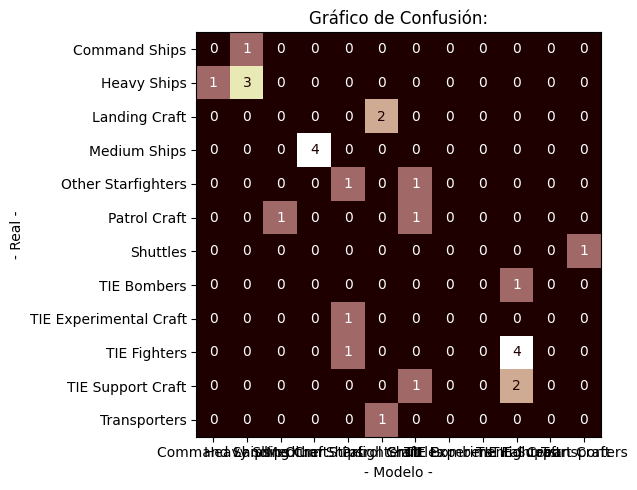

In [8]:
 #@title Evaluar modelo con datos de prueba
 # evalua al modelo entrenado
mostrar_detalle_prueba = False #@param {type:"boolean"}

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo_Clasificacion(x_test, y_test, CLASES, mostrar_detalle_prueba)